### Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeCV, LassoCV, Ridge, Lasso, SGDRegressor
from sklearn.svm import LinearSVR
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor, GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

### Helper for plotting important coefficients

In [2]:
def plot_important_features(coef, feature_names, top_n=20, ax=None, rotation=60):
    if ax is None:
        ax = plt.gca()
    inds = np.argsort(coef)
    low = inds[:top_n]
    high = inds[-top_n:]
    important = np.hstack([low, high])
    myrange = range(len(important))
    colors = ['red'] * top_n + ['blue'] * top_n
    
    ax.bar(myrange, coef[important], color=colors)
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[important], rotation=rotation, ha="right")
    ax.set_xlim(-.7, 2 * top_n)
    ax.set_frame_on(True)
    ax.grid(axis='y')

### Reading the latest (date based) splits

In [3]:
train = pd.read_csv('../data/temp/sampling_blind/latest/articles_train.csv')
test = pd.read_csv('../data/temp/sampling_blind/latest/articles_test.csv')

### Using a higher min_df as suggested by Sarah

### Without source first

In [4]:
tfidf = TfidfVectorizer(ngram_range=(1,3), min_df=10)

In [5]:
pipe = Pipeline((('tfidf', tfidf),
        ('regressor', Ridge())))

In [6]:
param_grid = [{'regressor':[Ridge(random_state=0)],
              'regressor__alpha':np.logspace(-3,3,13)},
              {'regressor':[LinearSVR(max_iter=10000, random_state=0)],
              'regressor__C':np.logspace(-2,3,11)}]

In [7]:
grid = GridSearchCV(pipe, param_grid, scoring=['r2', 'neg_mean_absolute_error', 'neg_root_mean_squared_error'], 
                    cv=5, verbose=2, refit='neg_mean_absolute_error')

In [8]:
grid.fit(train['content_body_clean'], train['blind_mean_rating'])

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001, total=   6.0s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s


[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001, total=   5.9s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001 
[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001, total=   6.1s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001 
[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001, total=   6.3s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, ra

[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.1, total=   5.7s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.31622776601683794 
[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.31622776601683794, total=   6.1s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.31622776601683794 
[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.31622776601683794, total=   5.9s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_in

[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=31.622776601683793, total=   6.0s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=31.622776601683793 
[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=31.622776601683793, total=   5.8s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=31.622776601683793 
[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=31.622776601683793, total=   5.5s
[CV] regressor=Ridge(alpha=1.0, copy_X=T

[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=0.01, total=   5.6s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=0.03162277660168379 
[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=0.03162277660168379, total=   6.0s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=0.03162277660168379 
[CV]  regressor=LinearSVR(C=1.0, dual

[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=1.0, total=   6.2s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=1.0 
[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=1.0, total=   6.0s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=1.0 
[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
         

[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=100.0, total=  10.7s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=100.0 
[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=100.0, total=  11.4s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=100.0 
[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
 

/Users/harish/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=316.22776601683796, total=  18.8s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=316.22776601683796 


/Users/harish/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=316.22776601683796, total=  18.9s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=316.22776601683796 


/Users/harish/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=316.22776601683796, total=  19.1s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=316.22776601683796 


/Users/harish/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=316.22776601683796, total=  19.6s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=316.22776601683796 
[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=316.22776601683796, total=  15.0s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=1000.0 


/Users/harish/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=1000.0, total=  22.5s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=1000.0 


/Users/harish/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=1000.0, total=  30.6s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=1000.0 


/Users/harish/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=1000.0, total=  26.4s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=1000.0 


/Users/harish/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=1000.0, total=  21.9s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=1000.0 


/Users/harish/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=1000.0, total=  21.6s


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 15.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=(('tfidf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=10,
                                                        ngram_range=(1, 3),
                                                        

In [9]:
cv_results = pd.DataFrame(grid.cv_results_)
cv_results['regressor'] = cv_results['param_regressor'].apply(lambda x:x.__class__.__name__)

In [24]:
cv_results.query('rank_test_neg_mean_absolute_error<=8')[['regressor', 'param_regressor__alpha', 'param_regressor__C', 'mean_test_r2', 'rank_test_r2', 'mean_test_neg_root_mean_squared_error', 'mean_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_error']]

,regressor,param_regressor__alpha,param_regressor__C,mean_test_r2,rank_test_r2,mean_test_neg_root_mean_squared_error,mean_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error
4,Ridge,0.1,NaN,0.082458,8,-0.834083,-0.642986,8
5,Ridge,0.316228,NaN,0.132205,5,-0.813241,-0.623550,5
6,Ridge,1,NaN,0.167949,1,-0.798473,-0.608332,2
7,Ridge,3.16228,NaN,0.164593,3,-0.801263,-0.609323,3
8,Ridge,10,NaN,0.126987,6,-0.819035,-0.625427,7
15,LinearSVR,NaN,0.1,0.124002,7,-0.819447,-0.623865,6
16,LinearSVR,NaN,0.316228,0.165946,2,-0.799600,-0.608192,1
17,LinearSVR,NaN,1,0.164560,4,-0.799266,-0.611908,4


### Test Predictions

In [12]:
test_pred = grid.predict(test['content_body_clean'])

In [13]:
print(f"Mean Absolute Error on the Test Set: {mean_absolute_error(test['blind_mean_rating'], test_pred):0.3f}")
print(f"Root Mean Squared Error on the Test Set: {mean_squared_error(test['blind_mean_rating'], test_pred, squared=False):0.3f}")
print(f"R Squared on the Test Set: {r2_score(test['blind_mean_rating'], test_pred):0.3f}")

Mean Absolute Error on the Test Set: 0.730
Root Mean Squared Error on the Test Set: 0.903
R Squared on the Test Set: 0.169


### Plotting test predictions vs actuals

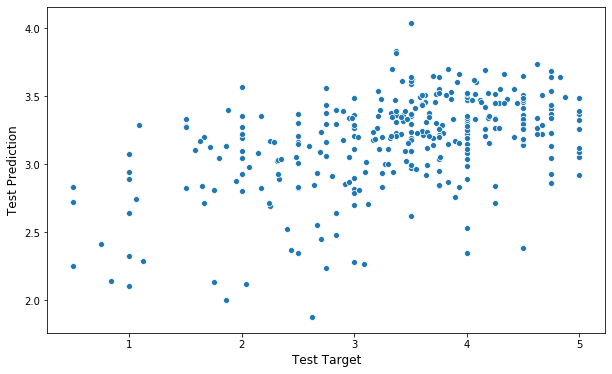

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=test['blind_mean_rating'], y=test_pred)
plt.xlabel('Test Target', fontsize=12)
plt.ylabel('Test Prediction', fontsize=12)
plt.show()

### Top Coefficients

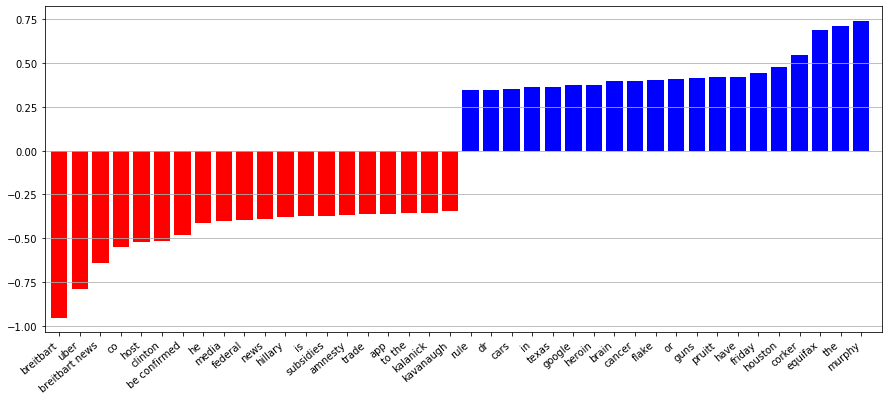

In [15]:
plt.figure(figsize=(15, 6))
plot_important_features(grid.best_estimator_.named_steps['regressor'].coef_.ravel(), np.array(grid.best_estimator_.named_steps['tfidf'].get_feature_names()), top_n=20, rotation=40)
ax = plt.gca()

### With Source

In [16]:
tfidf_src = TfidfVectorizer(ngram_range=(1,3), min_df=10)
ohe = OneHotEncoder(handle_unknown='ignore')

### TFIDF Vectorizer

In [17]:
tfidf_X_train = tfidf_src.fit_transform(train['content_body_clean'])
tfidf_X_test = tfidf_src.transform(test['content_body_clean'])

### One hot encoder for source

In [18]:
ohe_X_train = ohe.fit_transform(train[['content_source_desc']])
ohe_X_test = ohe.transform(test[['content_source_desc']])

### Stacking the two together

In [19]:
tfidf_ohe_X_train = np.hstack([tfidf_X_train.toarray(), ohe_X_train.toarray()])
tfidf_ohe_X_test = np.hstack([tfidf_X_test.toarray(), ohe_X_test.toarray()])

In [20]:
pipe_src = Pipeline([('regressor', Ridge())])

In [21]:
param_grid_src = [{'regressor':[Ridge(random_state=0)],
              'regressor__alpha':np.logspace(-3,3,13)},
              {'regressor':[LinearSVR(max_iter=10000, random_state=0)],
              'regressor__C':np.logspace(-2,3,11)}]

### Grid searching the models with a 5 fold CV

In [22]:
grid_src = GridSearchCV(pipe_src, param_grid_src, scoring=['r2', 'neg_mean_absolute_error', 'neg_root_mean_squared_error'], 
                    cv=5, verbose=2, refit='neg_mean_absolute_error')

In [25]:
grid_src.fit(tfidf_ohe_X_train, train['blind_mean_rating'])

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001, total=   0.5s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001, total=   0.5s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001 
[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001, total=   0.5s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001 
[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001, total=   0.8s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, ra

[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.1, total=   0.5s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.31622776601683794 
[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.31622776601683794, total=   0.6s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.31622776601683794 
[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.31622776601683794, total=   0.5s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_in

[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=31.622776601683793, total=   0.5s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=31.622776601683793 
[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=31.622776601683793, total=   0.6s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=31.622776601683793 
[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=31.622776601683793, total=   0.6s
[CV] regressor=Ridge(alpha=1.0, copy_X=T

[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=0.01, total=   0.3s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=0.03162277660168379 
[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=0.03162277660168379, total=   0.3s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=0.03162277660168379 
[CV]  regressor=LinearSVR(C=1.0, dual

[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=1.0, total=   0.4s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=1.0 
[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=1.0, total=   0.4s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=1.0 
[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
         

[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=100.0, total=  10.1s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=100.0 
[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=100.0, total=  10.6s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=100.0 
[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
 

/Users/harish/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=316.22776601683796, total=  15.0s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=316.22776601683796 


/Users/harish/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=316.22776601683796, total=  16.9s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=316.22776601683796 


/Users/harish/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=316.22776601683796, total=  17.3s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=316.22776601683796 


/Users/harish/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=316.22776601683796, total=  16.2s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=316.22776601683796 


/Users/harish/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=316.22776601683796, total=  14.4s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=1000.0 


/Users/harish/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=1000.0, total=  15.7s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=1000.0 


/Users/harish/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=1000.0, total=  16.6s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=1000.0 


/Users/harish/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=1000.0, total=  17.3s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=1000.0 


/Users/harish/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=1000.0, total=  16.2s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=1000.0 


/Users/harish/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  4.6min finished


[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=1000.0, total=  15.0s


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('regressor',
                                        Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=False,
                                              random_state=None, solver='auto',
                                              tol=0.001))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'regressor': [Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=Fa...
                          'regressor__C': array([1.00000000e-02, 3.16227766e-02, 1.00000000e-01, 3.16227766e-01,
       1.00000000e+00, 3.16227766e+00, 1.00000000e+01, 3.16227766e+01,
       1.00000000e+02, 

In [27]:
cv_results_src = pd.DataFrame(grid_src.cv_results_)

In [28]:
cv_results_src['regressor'] = cv_results_src['param_regressor'].apply(lambda x:x.__class__.__name__)

In [29]:
cv_results_src.query('rank_test_neg_mean_absolute_error<=8')[['regressor', 'param_regressor__alpha', 'param_regressor__C', 'mean_test_r2', 'rank_test_r2', 'mean_test_neg_root_mean_squared_error', 'mean_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_error']]

,regressor,param_regressor__alpha,param_regressor__C,mean_test_r2,rank_test_r2,mean_test_neg_root_mean_squared_error,mean_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error
6,Ridge,1,NaN,0.184709,6,-0.788437,-0.597614,4
7,Ridge,3.16228,NaN,0.194781,3,-0.784160,-0.594760,2
8,Ridge,10,NaN,0.190173,4,-0.786995,-0.599060,5
9,Ridge,31.6228,NaN,0.181737,8,-0.792240,-0.605499,8
14,LinearSVR,NaN,0.0316228,0.184957,5,-0.789253,-0.603450,7
15,LinearSVR,NaN,0.1,0.197856,2,-0.782663,-0.595975,3
16,LinearSVR,NaN,0.316228,0.206772,1,-0.778462,-0.590468,1
17,LinearSVR,NaN,1,0.181785,7,-0.789793,-0.600241,6


### Test Predictions

In [31]:
test_pred_src = grid_src.predict(tfidf_ohe_X_test)

In [33]:
print(f"Mean Absolute Error on the Test Set: {mean_absolute_error(test['blind_mean_rating'], test_pred_src):0.3f}")
print(f"Root Mean Squared Error on the Test Set: {mean_squared_error(test['blind_mean_rating'], test_pred_src, squared=False):0.3f}")
print(f"R Squared on the Test Set: {r2_score(test['blind_mean_rating'], test_pred_src):0.3f}")

Mean Absolute Error on the Test Set: 0.683
Root Mean Squared Error on the Test Set: 0.846
R Squared on the Test Set: 0.271


### Plotting test predictions vs actuals

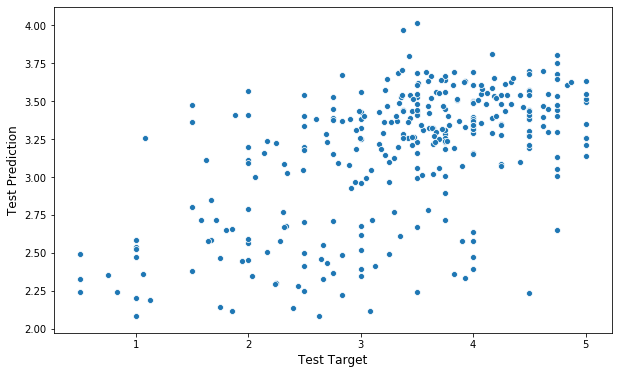

In [34]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=test['blind_mean_rating'], y=test_pred_src)
plt.xlabel('Test Target', fontsize=12)
plt.ylabel('Test Prediction', fontsize=12)
plt.show()

### Top Coefficients

In [35]:
feat_names = np.hstack([np.array(tfidf_src.get_feature_names()), ohe.get_feature_names()])

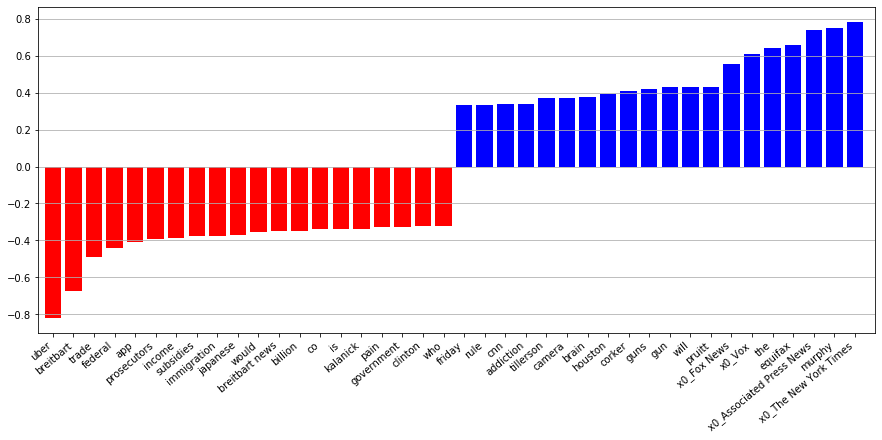

In [36]:
plt.figure(figsize=(15, 6))
plot_important_features(grid_src.best_estimator_.named_steps['regressor'].coef_, feat_names, top_n=20, rotation=40)
ax = plt.gca()

### With source but only using Ridge Regression

In [46]:
param_grid_src = [{'regressor':[Ridge(random_state=0)],
              'regressor__alpha':np.logspace(-3,3,13)}]

### Grid searching the models with a 5 fold CV

In [47]:
grid_src = GridSearchCV(pipe_src, param_grid_src, scoring=['r2', 'neg_mean_absolute_error', 'neg_root_mean_squared_error'], 
                    cv=5, verbose=2, refit='neg_mean_absolute_error')

In [48]:
grid_src.fit(tfidf_ohe_X_train, train['blind_mean_rating'])

Fitting 5 folds for each of 13 candidates, totalling 65 fits
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001, total=   0.4s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001, total=   0.4s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001 
[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001, total=   0.5s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001 
[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001, total=   0.4s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, ra

[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.1, total=   0.4s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.31622776601683794 
[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.31622776601683794, total=   0.4s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.31622776601683794 
[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.31622776601683794, total=   0.5s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_in

[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=31.622776601683793, total=   0.5s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=31.622776601683793 
[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=31.622776601683793, total=   0.5s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=31.622776601683793 
[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=31.622776601683793, total=   0.5s
[CV] regressor=Ridge(alpha=1.0, copy_X=T

[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:   31.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('regressor',
                                        Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=False,
                                              random_state=None, solver='auto',
                                              tol=0.001))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'regressor': [Ridge(alpha=3.1622776601683795,
                                              copy_X=True, fit_intercept=True,
                                              max_iter=No...
                          'regressor__alpha': array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+0

In [49]:
cv_results_src = pd.DataFrame(grid_src.cv_results_)
cv_results_src['regressor'] = cv_results_src['param_regressor'].apply(lambda x:x.__class__.__name__)

In [54]:
cv_results_src.query('rank_test_neg_mean_absolute_error<=8')[['regressor', 'param_regressor__alpha', 'mean_test_r2', 'rank_test_r2', 'mean_test_neg_root_mean_squared_error', 'mean_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_error']]

,regressor,param_regressor__alpha,mean_test_r2,rank_test_r2,mean_test_neg_root_mean_squared_error,mean_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error
4,Ridge,0.1,0.110153,7,-0.821420,-0.632875,7
5,Ridge,0.316228,0.150803,6,-0.803590,-0.613556,5
6,Ridge,1,0.184709,3,-0.788437,-0.597614,2
7,Ridge,3.16228,0.194781,1,-0.784160,-0.594760,1
8,Ridge,10,0.190173,2,-0.786995,-0.599060,3
9,Ridge,31.6228,0.181737,4,-0.792240,-0.605499,4
10,Ridge,100,0.154474,5,-0.806298,-0.618783,6
11,Ridge,316.228,0.095431,8,-0.833175,-0.641076,8


### Test Predictions

In [50]:
test_pred_src = grid_src.predict(tfidf_ohe_X_test)

In [53]:
print(f"Mean Absolute Error on the Test Set: {mean_absolute_error(test['blind_mean_rating'], test_pred_src):0.3f}")
print(f"Root Mean Squared Error on the Test Set: {mean_squared_error(test['blind_mean_rating'], test_pred_src, squared=False):0.3f}")
print(f"R Squared on the Test Set: {r2_score(test['blind_mean_rating'], test_pred_src):0.3f}")

Mean Absolute Error on the Test Set: 0.690
Root Mean Squared Error on the Test Set: 0.854
R Squared on the Test Set: 0.257


### Test Predictions

### Plotting test predictions vs actuals

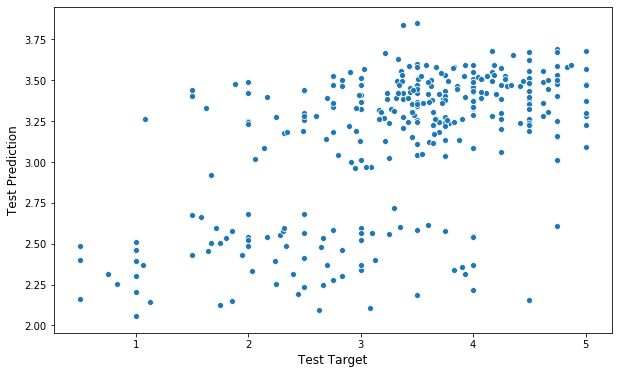

In [55]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=test['blind_mean_rating'], y=test_pred_src)
plt.xlabel('Test Target', fontsize=12)
plt.ylabel('Test Prediction', fontsize=12)
plt.show()

### Top Coefficients

In [56]:
feat_names = np.hstack([np.array(tfidf_src.get_feature_names()), ohe.get_feature_names()])

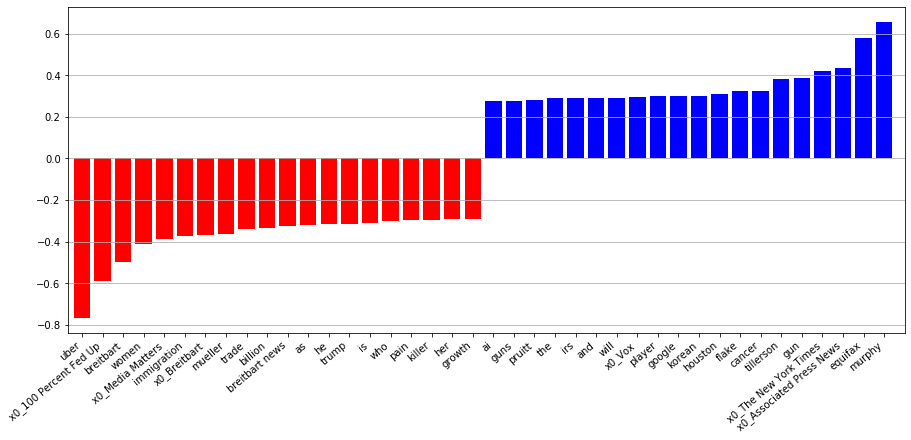

In [57]:
plt.figure(figsize=(15, 6))
plot_important_features(grid_src.best_estimator_.named_steps['regressor'].coef_, feat_names, top_n=20, rotation=40)
ax = plt.gca()

### We can see that the important coefficient list varies depending on the model chosen - we notice that the ridge model chooses more stop words than the linear SVR model - it's not super clear why that happens

#### We see that "murphy" is showing up as an important feature - let's look at the title of the articles that contain "murphy"

In [58]:
pd.set_option('display.max_colwidth', 1000)

In [59]:
train[train['content_body_clean'].apply(lambda x:'murphy' in x.lower())][['content_id', 'content_source_desc', 'date', 'content_title_clean', 'blind_mean_rating', 'blind_rating_count']]

,content_id,content_source_desc,date,content_title_clean,blind_mean_rating,blind_rating_count
51,2773,Associated Press News,2017-10-31,National security leaders say war authority sufficient,3.409091,11
118,2735,Fox News,2017-10-29,House tied to 1692 Salem witch trials rises from near ruin,3.812500,72
201,2765,Vox,2017-10-27,Congress is a breeding ground for harassment,3.692308,13
505,2228,The New York Times,2017-10-19,"Murphy and New Jersey Voters Can Get U.S. Back on Track, Obama Says",2.452381,42
641,2048,Fox News,2017-10-15,Dem Sen. Murphy: Trump's plan to end ObamaCare subsidies 'health care arson',3.666667,6
783,1865,Vox,2017-10-11,Obama has scheduled his first campaign event since Trump's election,4.250000,2
950,1623,Vox,2017-10-05,Anti-abortion legislator Rep. Tim Murphy to resign after abortion text message scandal,5.000000,1
975,1540,Vox,2017-10-05,Anti-abortion legislator Rep. Tim Murphy to resign after abortion text message scandal,5.000000,1
1010,1594,The New York Times,2017-10-04,G.O.P. Congressman to Retire After Reports He Asked Woman to Have Abortion,5.000000,1
1022,1555,The New York Times,2017-10-03,"Anti-Abortion Congressman Asked Woman to Have One, Report Says",5.000000,1


### Looks like there are some duplicates in both the train and the test data based on the content body - this may need clean up

In [60]:
train['content_body_clean'].drop_duplicates().shape

(1275,)

In [61]:
train.shape

(1301, 11)

### When we are removing duplicates from the sampled datasets, we can also remove the small set of articles from 2015 before the train test split

### Using the SGDRegressor as suggested by Daniel along with a min_df of 10 for the version with the source

In [62]:
pipe_sgd = Pipeline([('regressor', SGDRegressor())])

In [63]:
param_grid_sgd = [{'regressor':[SGDRegressor(max_iter=10000, random_state=0, eta0=0.5)],
              'regressor__alpha':np.logspace(-3,2,13)}]

### Grid searching the models with a 5 fold CV

In [64]:
grid_sgd = GridSearchCV(pipe_sgd, param_grid_sgd, scoring=['r2', 'neg_mean_absolute_error', 'neg_root_mean_squared_error'], 
                    cv=5, verbose=2, refit='neg_mean_absolute_error')

In [65]:
grid_sgd.fit(tfidf_ohe_X_train, train['blind_mean_rating'])

Fitting 5 folds for each of 13 candidates, totalling 65 fits
[CV] regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=0.001 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=0.001, total=   1.6s
[CV] regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=0.001 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=0.001, total=   1.7s
[CV] regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=0.001 
[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5,

[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=0.006812920690579615, total=   0.6s
[CV] regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=0.006812920690579615 
[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsil

[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=0.046415888336127795, total=   0.7s
[CV] regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=0.046415888336127795 
[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsil

[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=0.12115276586285889, total=   0.8s
[CV] regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=0.31622776601683794 
[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon

[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=0.825404185268019, total=   0.8s
[CV] regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=0.825404185268019 
[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1

[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=5.623413251903491, total=   0.8s
[CV] regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=5.623413251903491 
[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1

[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=38.31186849557293, total=   1.0s
[CV] regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=38.31186849557293 
[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1

[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:   55.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('regressor',
                                        SGDRegressor(alpha=0.0001,
                                                     average=False,
                                                     early_stopping=False,
                                                     epsilon=0.1, eta0=0.01,
                                                     fit_intercept=True,
                                                     l1_ratio=0.15,
                                                     learning_rate='invscaling',
                                                     loss='squared_loss',
                                                     max_iter=1000,
                                                     n_iter_no_change=5,
                                                     penalty='l2', power_t=0.25,
                                                     random_s

In [66]:
cv_results_sgd = pd.DataFrame(grid_sgd.cv_results_)
cv_results_sgd['regressor'] = cv_results_sgd['param_regressor'].apply(lambda x:x.__class__.__name__)

In [67]:
cv_results_sgd.query('rank_test_neg_mean_absolute_error<=8')[['regressor', 'param_regressor__alpha', 'mean_test_r2', 'rank_test_r2', 'mean_test_neg_root_mean_squared_error', 'mean_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_error']]

,regressor,param_regressor__alpha,mean_test_r2,rank_test_r2,mean_test_neg_root_mean_squared_error,mean_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error
0,SGDRegressor,0.001,0.169206,2,-0.797303,-0.606302,2
1,SGDRegressor,0.00261016,0.179656,1,-0.790670,-0.598623,1
2,SGDRegressor,0.00681292,0.150492,4,-0.807418,-0.617884,4
3,SGDRegressor,0.0177828,0.154182,3,-0.805282,-0.612359,3
4,SGDRegressor,0.0464159,0.149263,5,-0.809070,-0.618275,5
5,SGDRegressor,0.121153,0.124936,6,-0.821245,-0.629530,6
6,SGDRegressor,0.316228,0.074654,7,-0.841025,-0.652669,7
7,SGDRegressor,0.825404,0.023676,8,-0.862630,-0.669326,8


In [68]:
grid_sgd.best_estimator_

Pipeline(memory=None,
         steps=[('regressor',
                 SGDRegressor(alpha=0.0026101572156825357, average=False,
                              early_stopping=False, epsilon=0.1, eta0=0.5,
                              fit_intercept=True, l1_ratio=0.15,
                              learning_rate='invscaling', loss='squared_loss',
                              max_iter=10000, n_iter_no_change=5, penalty='l2',
                              power_t=0.25, random_state=0, shuffle=True,
                              tol=0.001, validation_fraction=0.1, verbose=0,
                              warm_start=False))],
         verbose=False)

### Test Predictions

In [69]:
test_pred_sgd = grid_sgd.predict(tfidf_ohe_X_test)

In [70]:
print(f"Mean Absolute Error on the Test Set: {mean_absolute_error(test['blind_mean_rating'], test_pred_sgd):0.3f}")
print(f"Root Mean Squared Error on the Test Set: {mean_squared_error(test['blind_mean_rating'], test_pred_sgd, squared=False):0.3f}")
print(f"R Squared on the Test Set: {r2_score(test['blind_mean_rating'], test_pred_sgd):0.3f}")

Mean Absolute Error on the Test Set: 0.676
Root Mean Squared Error on the Test Set: 0.843
R Squared on the Test Set: 0.277


### Plotting test predictions vs actuals

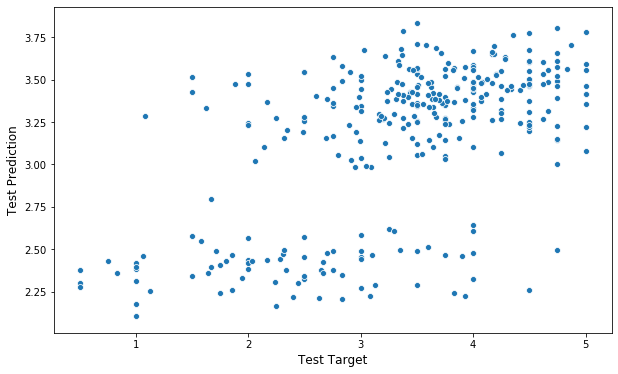

In [73]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=test['blind_mean_rating'], y=test_pred_sgd)
plt.xlabel('Test Target', fontsize=12)
plt.ylabel('Test Prediction', fontsize=12)
plt.show()

### Top Coefficients

In [74]:
feat_names = np.hstack([np.array(tfidf_src.get_feature_names()), ohe.get_feature_names()])

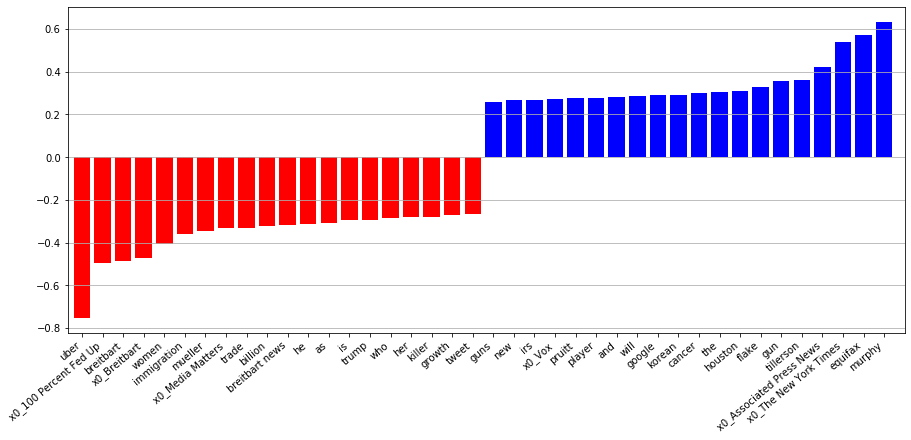

In [75]:
plt.figure(figsize=(15, 6))
plot_important_features(grid_sgd.best_estimator_.named_steps['regressor'].coef_, feat_names, top_n=20, rotation=40)
ax = plt.gca()

### Comparing the above regressors with a dummy regressor

In [76]:
from sklearn.dummy import DummyRegressor

In [77]:
d = DummyRegressor(strategy='mean')

In [78]:
d.fit(train['content_body_clean'], train['blind_mean_rating'])

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [79]:
d_pred = d.predict(test['content_body_clean'])

In [80]:
print(f"Mean Absolute Error on the Test Set: {mean_absolute_error(test['blind_mean_rating'], d_pred):0.3f}")
print(f"Root Mean Squared Error on the Test Set: {mean_squared_error(test['blind_mean_rating'], d_pred, squared=False):0.3f}")
print(f"R Squared on the Test Set: {r2_score(test['blind_mean_rating'], d_pred):0.3f}")

Mean Absolute Error on the Test Set: 0.832
Root Mean Squared Error on the Test Set: 1.011
R Squared on the Test Set: -0.042


________________________________

### Keeping only articles with a high number of ratings and removing duplicates as well

In [81]:
train_high = train.drop_duplicates(subset=['content_body_clean', 'content_source_desc'])
train_high = train_high[train_high['blind_rating_count']>=3]

In [82]:
test_high = test.drop_duplicates(subset=['content_body_clean', 'content_source_desc'])
test_high = test_high[test_high['blind_rating_count']>=3]

### With Source

In [83]:
tfidf_src_high = TfidfVectorizer(ngram_range=(1,3), min_df=10)
ohe_high = OneHotEncoder(handle_unknown='ignore')

### TFIDF Vectorizer

In [84]:
tfidf_X_train_high = tfidf_src_high.fit_transform(train_high['content_body_clean'])
tfidf_X_test_high = tfidf_src_high.transform(test_high['content_body_clean'])

### One hot encoder for source

In [85]:
ohe_X_train_high = ohe_high.fit_transform(train_high[['content_source_desc']])
ohe_X_test_high = ohe_high.transform(test_high[['content_source_desc']])

### Stacking the two together

In [86]:
tfidf_ohe_X_train_high = np.hstack([tfidf_X_train_high.toarray(), ohe_X_train_high.toarray()])
tfidf_ohe_X_test_high = np.hstack([tfidf_X_test_high.toarray(), ohe_X_test_high.toarray()])

In [87]:
pipe_src_high = Pipeline([('regressor', Ridge())])

In [88]:
param_grid_src_high = [{'regressor':[Ridge(random_state=0)],
              'regressor__alpha':np.logspace(-3,3,13)},
              {'regressor':[LinearSVR(max_iter=10000, random_state=0)],
              'regressor__C':np.logspace(-2,3,11)},
              {'regressor':[SGDRegressor(max_iter=10000, random_state=0, eta0=0.5)],
              'regressor__alpha':np.logspace(-3,2,13)}]

### Grid searching the models with a 5 fold CV

In [89]:
grid_src_high = GridSearchCV(pipe_src_high, param_grid_src_high, scoring=['r2', 'neg_mean_absolute_error', 'neg_root_mean_squared_error'], 
                    cv=5, verbose=2, refit='neg_mean_absolute_error')

In [90]:
grid_src_high.fit(tfidf_ohe_X_train_high, train_high['blind_mean_rating'])

Fitting 5 folds for each of 37 candidates, totalling 185 fits
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001 
[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001, total=   0.2s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001, total=   0.2s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001 
[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001, total=   0.1s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001 
[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001, total=   0.2s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, ra

[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.31622776601683794, total=   0.1s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.31622776601683794 
[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.31622776601683794, total=   0.1s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.31622776601683794 
[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.31622776601683794, total=   0.1s
[CV] regressor=Ridge(alpha=1.0, cop

[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=31.622776601683793, total=   0.2s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=31.622776601683793 
[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=31.622776601683793, total=   0.1s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=100.0 
[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=100.0, total=   0.2s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, m

          random_state=0, tol=0.0001, verbose=0), regressor__C=0.03162277660168379 
[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=0.03162277660168379, total=   0.1s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=0.03162277660168379 
[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=0.03162277660168379, total=   0.1s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state

[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=1.0, total=   0.1s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=3.1622776601683795 
[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=3.1622776601683795, total=   0.3s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=3.1622776601683795 
[CV]  regressor=LinearSVR(C=1.0, dual=Tru

[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=100.0, total=   1.0s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=100.0 
[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=100.0, total=   1.0s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=100.0 
[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
 

[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=0.001, total=   0.7s
[CV] regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=0.001 
[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5,

[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=0.006812920690579615, total=   0.4s
[CV] regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=0.006812920690579615 
[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsil

[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=0.046415888336127795, total=   0.3s
[CV] regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=0.046415888336127795 
[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsil

[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=0.31622776601683794, total=   0.4s
[CV] regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=0.31622776601683794 
[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon

[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=0.825404185268019, total=   0.3s
[CV] regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=2.1544346900318843 
[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.

[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=5.623413251903491, total=   0.3s
[CV] regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=14.677992676220706 
[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.

[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=38.31186849557293, total=   0.4s
[CV] regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=100.0 
[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
          

[Parallel(n_jobs=1)]: Done 185 out of 185 | elapsed:  1.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('regressor',
                                        Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=False,
                                              random_state=None, solver='auto',
                                              tol=0.001))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'regressor': [Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=Fa...
                          'regressor__alpha': array([1.00000000e-03, 2.61015722e-03, 6.81292069e-03, 1.77827941e-02,
       4.64158883e-02, 1.21152766e-01, 3.16227766e-01, 8.25404185e-01,
       2.15443469e+

In [92]:
cv_results_src_high = pd.DataFrame(grid_src_high.cv_results_)
cv_results_src_high['regressor'] = cv_results_src_high['param_regressor'].apply(lambda x:x.__class__.__name__)

In [93]:
cv_results_src_high.query('rank_test_neg_mean_absolute_error<=8')[['regressor', 'param_regressor__alpha', 'param_regressor__C', 'mean_test_r2', 'rank_test_r2', 'mean_test_neg_root_mean_squared_error', 'mean_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_error']]

,regressor,param_regressor__alpha,param_regressor__C,mean_test_r2,rank_test_r2,mean_test_neg_root_mean_squared_error,mean_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error
5,Ridge,0.316228,NaN,0.245898,7,-0.593583,-0.459471,5
6,Ridge,1,NaN,0.266470,1,-0.585820,-0.452680,1
7,Ridge,3.16228,NaN,0.262500,2,-0.587659,-0.454098,2
8,Ridge,10,NaN,0.244666,8,-0.594842,-0.461733,8
15,LinearSVR,NaN,0.1,0.247207,5,-0.593505,-0.460182,7
16,LinearSVR,NaN,0.316228,0.262313,3,-0.587410,-0.455744,3
24,SGDRegressor,0.001,NaN,0.250958,4,-0.592107,-0.457535,4
25,SGDRegressor,0.00261016,NaN,0.246945,6,-0.593890,-0.459481,6


In [94]:
grid_src_high.best_estimator_

Pipeline(memory=None,
         steps=[('regressor',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=0,
                       solver='auto', tol=0.001))],
         verbose=False)

### Test Predictions

In [95]:
test_pred_src_high = grid_src_high.predict(tfidf_ohe_X_test_high)

In [98]:
print(f"Mean Absolute Error on the Test Set: {mean_absolute_error(test_high['blind_mean_rating'], test_pred_src_high):0.3f}")
print(f"Root Mean Squared Error on the Test Set: {mean_squared_error(test_high['blind_mean_rating'], test_pred_src_high, squared=False):0.3f}")
print(f"R Squared on the Test Set: {r2_score(test_high['blind_mean_rating'], test_pred_src_high):0.3f}")

Mean Absolute Error on the Test Set: 0.561
Root Mean Squared Error on the Test Set: 0.706
R Squared on the Test Set: 0.321


### Plotting test predictions vs actuals

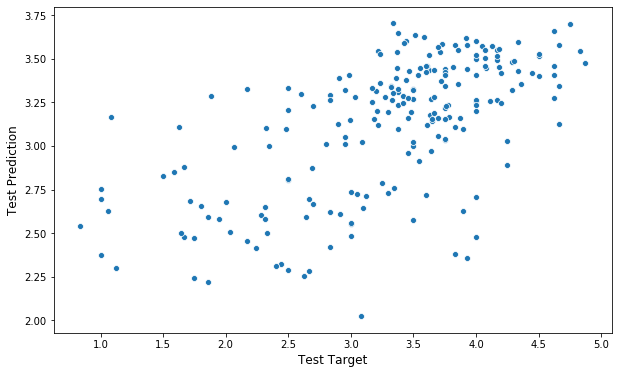

In [100]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=test_high['blind_mean_rating'], y=test_pred_src_high)
plt.xlabel('Test Target', fontsize=12)
plt.ylabel('Test Prediction', fontsize=12)
plt.show()

### Top Coefficients

In [101]:
feat_names_high = np.hstack([np.array(tfidf_src_high.get_feature_names()), ohe_high.get_feature_names()])

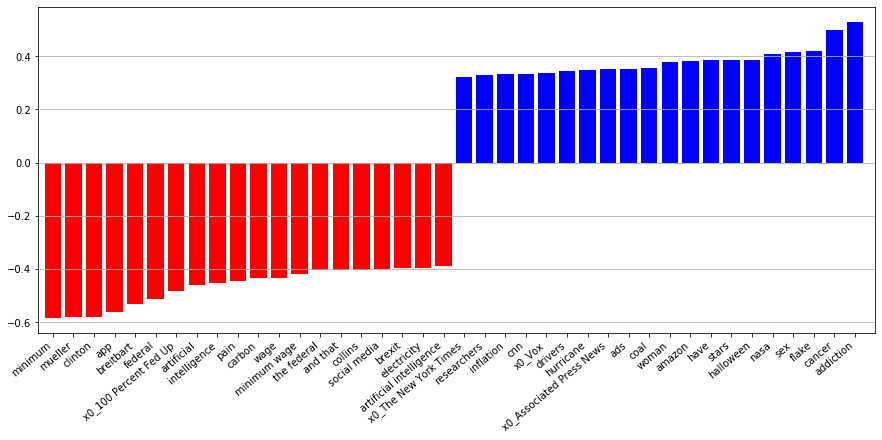

In [102]:
plt.figure(figsize=(15, 6))
plot_important_features(grid_src_high.best_estimator_.named_steps['regressor'].coef_, feat_names_high, top_n=20, rotation=40)
ax = plt.gca()

### Comparing with dummy regressor

In [103]:
d.fit(train_high['content_body_clean'], train_high['blind_mean_rating'])

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [104]:
d_pred = d.predict(test_high['content_body_clean'])

In [106]:
print(f"Mean Absolute Error on the Test Set: {mean_absolute_error(test_high['blind_mean_rating'], d_pred):0.3f}")
print(f"Root Mean Squared Error on the Test Set: {mean_squared_error(test_high['blind_mean_rating'], d_pred, squared=False):0.3f}")
print(f"R Squared on the Test Set: {r2_score(test_high['blind_mean_rating'], d_pred):0.3f}")

Mean Absolute Error on the Test Set: 0.709
Root Mean Squared Error on the Test Set: 0.869
R Squared on the Test Set: -0.028


________________________________

### Including user level information as a predictor in the model

In [107]:
article_ratings = pd.read_csv('../data/raw/knight_data_ratings.csv')
article_ratings_blind = article_ratings[article_ratings['blind']==1]

In [108]:
readers = pd.read_csv('../data/raw/readers.csv')

In [109]:
readers.iloc[0]

external_user_id                                                         047641_S02_01
q1_approval_trump                                                                    1
q3_congress                                                                          3
q4_state_gov                                                                         3
q5_local_gov                                                                         3
q6_repub_congress                                                                    3
q7_dems_congress                                                                     5
q8_follow_news                                                                       2
q34_political_views                                                  Very conservative
q9_change_political_view                                                             2
q25_time_spent_news                                                                  4
q27_news_trust_exist                       

#### Using just the political views and the political affilition for now

In [110]:
article_user = pd.merge(article_ratings_blind, readers[['external_user_id', 'q34_political_views', 'q36_today_politcal_aff']], on='external_user_id', how='inner')

In [111]:
article_user = article_user.fillna('Unknown')

In [112]:
article_user_pol_views = article_user.groupby(['content_id', 'q34_political_views'])['rating_scale_response'].count().reset_index()
article_user_pol_views['pol_views_perc'] = article_user_pol_views.groupby(['content_id'])['rating_scale_response'].transform(lambda x:x/sum(x))

In [113]:
article_user_pol_views = article_user_pol_views.pivot_table(index='content_id', columns='q34_political_views', values='pol_views_perc').reset_index()
article_user_pol_views = article_user_pol_views.fillna(0)
article_user_pol_views.columns = ['content_id'] + ['pol_view_' + col for col in article_user_pol_views.columns if col!='content_id']

In [114]:
article_user_pol_aff = article_user.groupby(['content_id', 'q36_today_politcal_aff'])['rating_scale_response'].count().reset_index()
article_user_pol_aff['pol_aff_perc'] = article_user_pol_aff.groupby(['content_id'])['rating_scale_response'].transform(lambda x:x/sum(x))

In [115]:
article_user_pol_aff = article_user_pol_aff.pivot_table(index='content_id', columns='q36_today_politcal_aff', values='pol_aff_perc').reset_index()
article_user_pol_aff = article_user_pol_aff.fillna(0)
article_user_pol_aff.columns = ['content_id'] + ['pol_aff_' + col for col in article_user_pol_aff.columns if col!='content_id']

In [116]:
article_user_info = pd.merge(article_user_pol_aff, article_user_pol_views, on='content_id', how='inner')

In [117]:
article_user_info.query('content_id==1769')

,content_id,pol_aff_Democrat,pol_aff_Independent,pol_aff_Lean Democrat,pol_aff_Lean Republican,pol_aff_Other,pol_aff_Republican,pol_aff_Unknown,pol_view_Conservative,pol_view_Liberal,pol_view_Moderate,pol_view_Unknown,pol_view_Very conservative,pol_view_Very liberal
424,1769,0.220085,0.213675,0.119658,0.149573,0.023504,0.222222,0.051282,0.25641,0.175214,0.346154,0.047009,0.074786,0.100427


### Adding this to the data to see if the performance improves

In [118]:
train = pd.read_csv('../data/temp/sampling_blind/latest/articles_train.csv')
test = pd.read_csv('../data/temp/sampling_blind/latest/articles_test.csv')

In [119]:
train = pd.merge(train, article_user_info, on='content_id', how='inner')
test = pd.merge(test, article_user_info, on='content_id', how='inner')

### Using the version with the source

In [120]:
tfidf_src = TfidfVectorizer(ngram_range=(1,3), min_df=10)
ohe = OneHotEncoder(handle_unknown='ignore')

### TFIDF Vectorizer

In [121]:
tfidf_X_train = tfidf_src.fit_transform(train['content_body_clean'])
tfidf_X_test = tfidf_src.transform(test['content_body_clean'])

### One hot encoder for source

In [122]:
ohe_X_train = ohe.fit_transform(train[['content_source_desc']])
ohe_X_test = ohe.transform(test[['content_source_desc']])

### Selecting user information to be added to the model

In [123]:
user_X_train = train.loc[:,'pol_aff_Democrat':].values
user_X_test = test.loc[:,'pol_aff_Democrat':].values

### Stacking the three together

In [124]:
tfidf_ohe_user_X_train = np.hstack([tfidf_X_train.toarray(), ohe_X_train.toarray(), user_X_train])
tfidf_ohe_user_X_test = np.hstack([tfidf_X_test.toarray(), ohe_X_test.toarray(), user_X_test])

In [125]:
pipe_src_user = Pipeline([('regressor', Ridge())])

In [126]:
param_grid_src_user = [{'regressor':[Ridge(random_state=0)],
              'regressor__alpha':np.logspace(-3,3,13)},
              {'regressor':[LinearSVR(max_iter=10000, random_state=0)],
              'regressor__C':np.logspace(-2,3,11)},
              {'regressor':[SGDRegressor(max_iter=10000, random_state=0, eta0=0.5)],
              'regressor__alpha':np.logspace(-3,2,13)}]

### Grid searching the models with a 5 fold CV

In [127]:
grid_src_user = GridSearchCV(pipe_src_user, param_grid_src_user, scoring=['r2', 'neg_mean_absolute_error', 'neg_root_mean_squared_error'], 
                    cv=5, verbose=2, refit='neg_mean_absolute_error')

In [128]:
grid_src_user.fit(tfidf_ohe_user_X_train, train['blind_mean_rating'])

Fitting 5 folds for each of 37 candidates, totalling 185 fits
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001, total=   0.5s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001, total=   0.4s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001 
[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001, total=   0.5s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001 
[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001, total=   0.5s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, ra

[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.1, total=   0.5s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.31622776601683794 
[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.31622776601683794, total=   0.6s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.31622776601683794 
[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.31622776601683794, total=   0.6s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_in

[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=31.622776601683793, total=   0.6s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=31.622776601683793 
[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=31.622776601683793, total=   0.5s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=31.622776601683793 
[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=31.622776601683793, total=   0.5s
[CV] regressor=Ridge(alpha=1.0, copy_X=T

[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=0.01, total=   0.2s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=0.03162277660168379 
[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=0.03162277660168379, total=   0.2s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=0.03162277660168379 
[CV]  regressor=LinearSVR(C=1.0, dual

[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=1.0, total=   0.3s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=1.0 
[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=1.0, total=   0.4s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=1.0 
[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
         

/Users/harish/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=31.622776601683793, total=  15.4s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=31.622776601683793 
[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=31.622776601683793, total=  10.5s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=31.622776601683793 
[CV]  regressor=LinearSVR(

/Users/harish/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=100.0, total=  14.7s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=100.0 


/Users/harish/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=100.0, total=  14.8s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=100.0 


/Users/harish/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=100.0, total=  14.4s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=100.0 


/Users/harish/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=100.0, total=  14.9s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=100.0 


/Users/harish/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=100.0, total=  17.5s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=316.22776601683796 


/Users/harish/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=316.22776601683796, total=  14.9s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=316.22776601683796 


/Users/harish/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=316.22776601683796, total=  17.3s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=316.22776601683796 


/Users/harish/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=316.22776601683796, total=  18.0s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=316.22776601683796 


/Users/harish/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=316.22776601683796, total=  21.4s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=316.22776601683796 


/Users/harish/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=316.22776601683796, total=  16.7s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=1000.0 


/Users/harish/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=1000.0, total=  16.3s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=1000.0 


/Users/harish/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=1000.0, total=  15.4s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=1000.0 


/Users/harish/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=1000.0, total=  17.1s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=1000.0 


/Users/harish/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=1000.0, total=  16.2s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=1000.0 


/Users/harish/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=1000.0, total=  16.2s
[CV] regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=0.001 
[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle

[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=0.0026101572156825357, total=   1.0s
[CV] regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=0.006812920690579615 
[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsi

[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=0.01778279410038923, total=   0.7s
[CV] regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=0.01778279410038923 
[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon

[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=0.12115276586285889, total=   1.1s
[CV] regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=0.12115276586285889 
[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon

[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=0.825404185268019, total=   0.6s
[CV] regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=0.825404185268019 
[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1

[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=5.623413251903491, total=   0.6s
[CV] regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=5.623413251903491 
[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1

[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=38.31186849557293, total=   0.8s
[CV] regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=38.31186849557293 
[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1

[Parallel(n_jobs=1)]: Done 185 out of 185 | elapsed:  7.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('regressor',
                                        Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=False,
                                              random_state=None, solver='auto',
                                              tol=0.001))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'regressor': [Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=Fa...
                          'regressor__alpha': array([1.00000000e-03, 2.61015722e-03, 6.81292069e-03, 1.77827941e-02,
       4.64158883e-02, 1.21152766e-01, 3.16227766e-01, 8.25404185e-01,
       2.15443469e+

In [129]:
cv_results_src_user = pd.DataFrame(grid_src_user.cv_results_)

In [130]:
cv_results_src_user['regressor'] = cv_results_src_user['param_regressor'].apply(lambda x:x.__class__.__name__)

In [131]:
cv_results_src_user.query('rank_test_neg_mean_absolute_error<=8')[['regressor', 'param_regressor__alpha', 'param_regressor__C', 'mean_test_r2', 'rank_test_r2', 'mean_test_neg_root_mean_squared_error', 'mean_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_error']]

,regressor,param_regressor__alpha,param_regressor__C,mean_test_r2,rank_test_r2,mean_test_neg_root_mean_squared_error,mean_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error
7,Ridge,3.16228,NaN,0.166904,6,-0.795310,-0.604846,4
8,Ridge,10,NaN,0.181453,2,-0.789700,-0.603650,2
9,Ridge,31.6228,NaN,0.187484,1,-0.788626,-0.604951,5
14,LinearSVR,NaN,0.0316228,0.169376,3,-0.795908,-0.607505,6
15,LinearSVR,NaN,0.1,0.168153,4,-0.795713,-0.604816,3
16,LinearSVR,NaN,0.316228,0.168052,5,-0.795303,-0.599976,1
17,LinearSVR,NaN,1,0.139919,12,-0.806741,-0.607798,7
24,SGDRegressor,0.001,NaN,0.141253,11,-0.806454,-0.608721,8


In [132]:
grid_src_user.best_estimator_

Pipeline(memory=None,
         steps=[('regressor',
                 LinearSVR(C=0.31622776601683794, dual=True, epsilon=0.0,
                           fit_intercept=True, intercept_scaling=1.0,
                           loss='epsilon_insensitive', max_iter=10000,
                           random_state=0, tol=0.0001, verbose=0))],
         verbose=False)

### Test Predictions

In [134]:
test_pred_src_user = grid_src_user.predict(tfidf_ohe_user_X_test)

In [135]:
print(f"Mean Absolute Error on the Test Set: {mean_absolute_error(test['blind_mean_rating'], test_pred_src_user):0.3f}")
print(f"Root Mean Squared Error on the Test Set: {mean_squared_error(test['blind_mean_rating'], test_pred_src_user, squared=False):0.3f}")
print(f"R Squared on the Test Set: {r2_score(test['blind_mean_rating'], test_pred_src_user):0.3f}")

Mean Absolute Error on the Test Set: 0.686
Root Mean Squared Error on the Test Set: 0.852
R Squared on the Test Set: 0.260


### Plotting test predictions vs actuals

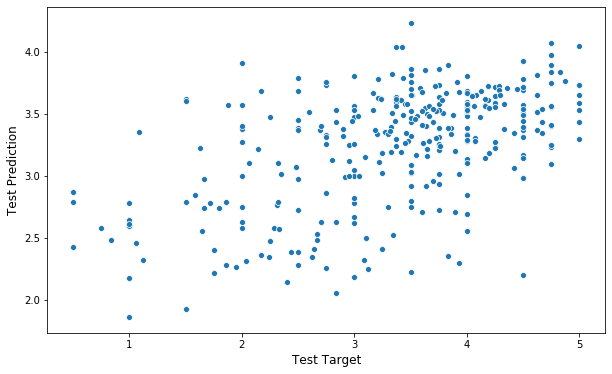

In [137]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=test['blind_mean_rating'], y=test_pred_src_user)
plt.xlabel('Test Target', fontsize=12)
plt.ylabel('Test Prediction', fontsize=12)
plt.show()

### Top Coefficients

In [138]:
feat_names = np.hstack([np.array(tfidf_src.get_feature_names()), ohe.get_feature_names(), train.loc[:,'pol_aff_Democrat':].columns])

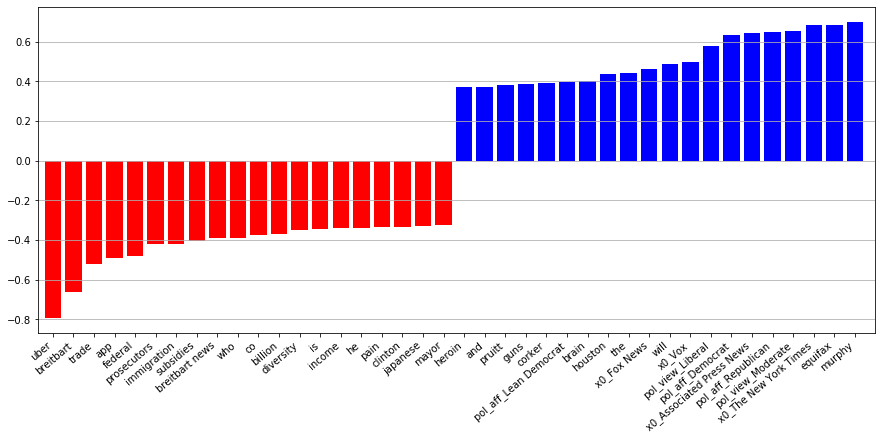

In [139]:
plt.figure(figsize=(15, 6))
plot_important_features(grid_src_user.best_estimator_.named_steps['regressor'].coef_, feat_names, top_n=20, rotation=40)
ax = plt.gca()

### Need to think of a way to introducing interactions without blowing up the feature space. Also, from this, it's clear the feature importance misses the point altogether - people with either political affiliation find things trustworthy

### Repeating with just the articles having atleast 3 ratings yields this

In [141]:
train_high = train.drop_duplicates(subset=['content_body_clean', 'content_source_desc'])
train_high = train_high[train_high['blind_rating_count']>=3]
test_high = test.drop_duplicates(subset=['content_body_clean', 'content_source_desc'])
test_high = test_high[test_high['blind_rating_count']>=3]

In [142]:
tfidf_src = TfidfVectorizer(ngram_range=(1,3), min_df=10)
ohe = OneHotEncoder(handle_unknown='ignore')

### TFIDF Vectorizer

In [143]:
tfidf_X_train = tfidf_src.fit_transform(train_high['content_body_clean'])
tfidf_X_test = tfidf_src.transform(test_high['content_body_clean'])

### One hot encoder for source

In [144]:
ohe_X_train = ohe.fit_transform(train_high[['content_source_desc']])
ohe_X_test = ohe.transform(test_high[['content_source_desc']])

### Selecting user information to be added to the model

In [145]:
user_X_train = train_high.loc[:,'pol_aff_Democrat':].values
user_X_test = test_high.loc[:,'pol_aff_Democrat':].values

### Stacking the three together

In [146]:
tfidf_ohe_user_X_train = np.hstack([tfidf_X_train.toarray(), ohe_X_train.toarray(), user_X_train])
tfidf_ohe_user_X_test = np.hstack([tfidf_X_test.toarray(), ohe_X_test.toarray(), user_X_test])

In [147]:
pipe_src_user = Pipeline([('regressor', Ridge())])

In [148]:
param_grid_src_user = [{'regressor':[Ridge(random_state=0)],
              'regressor__alpha':np.logspace(-3,3,13)},
              {'regressor':[LinearSVR(max_iter=10000, random_state=0)],
              'regressor__C':np.logspace(-2,3,11)},
              {'regressor':[SGDRegressor(max_iter=10000, random_state=0, eta0=0.5)],
              'regressor__alpha':np.logspace(-3,2,13)}]

### Grid searching the models with a 5 fold CV

In [149]:
grid_src_user = GridSearchCV(pipe_src_user, param_grid_src_user, scoring=['r2', 'neg_mean_absolute_error', 'neg_root_mean_squared_error'], 
                    cv=5, verbose=2, refit='neg_mean_absolute_error')

In [150]:
grid_src_user.fit(tfidf_ohe_user_X_train, train_high['blind_mean_rating'])

Fitting 5 folds for each of 37 candidates, totalling 185 fits
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001 
[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001, total=   0.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001 
[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001, total=   0.2s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001 
[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001, total=   0.2s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001 
[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, 

[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.1, total=   0.2s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.31622776601683794 
[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.31622776601683794, total=   0.1s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.31622776601683794 
[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.31622776601683794, total=   0.2s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_in

[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=31.622776601683793, total=   0.2s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=31.622776601683793 
[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=31.622776601683793, total=   0.2s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=31.622776601683793 
[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=31.622776601683793, total=   0.2s
[CV] regressor=Ridge(alpha=1.0, copy_X=T

[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=0.01, total=   0.1s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=0.03162277660168379 
[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=0.03162277660168379, total=   0.1s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=0.03162277660168379 
[CV]  regressor=LinearSVR(C=1.0, dual

[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=1.0, total=   0.2s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=1.0 
[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=1.0, total=   0.2s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=3.1622776601683795 
[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=

[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=100.0, total=   0.8s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=100.0 
[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=100.0, total=   1.0s
[CV] regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=0, tol=0.0001, verbose=0), regressor__C=100.0 
[CV]  regressor=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
 

[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=0.001, total=   0.8s
[CV] regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=0.001 
[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5,

[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=0.006812920690579615, total=   0.4s
[CV] regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=0.006812920690579615 
[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsil

[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=0.046415888336127795, total=   0.3s
[CV] regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=0.046415888336127795 
[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsil

[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=0.31622776601683794, total=   0.4s
[CV] regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=0.31622776601683794 
[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon

[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=0.825404185268019, total=   0.3s
[CV] regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=2.1544346900318843 
[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.

[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=5.623413251903491, total=   0.3s
[CV] regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=14.677992676220706 
[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.

[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=38.31186849557293, total=   0.4s
[CV] regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.5, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False), regressor__alpha=100.0 
[CV]  regressor=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
          

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 185 out of 185 | elapsed:  1.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('regressor',
                                        Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=False,
                                              random_state=None, solver='auto',
                                              tol=0.001))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'regressor': [Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=Fa...
                          'regressor__alpha': array([1.00000000e-03, 2.61015722e-03, 6.81292069e-03, 1.77827941e-02,
       4.64158883e-02, 1.21152766e-01, 3.16227766e-01, 8.25404185e-01,
       2.15443469e+

In [151]:
cv_results_src_user = pd.DataFrame(grid_src_user.cv_results_)
cv_results_src_user['regressor'] = cv_results_src_user['param_regressor'].apply(lambda x:x.__class__.__name__)

In [153]:
cv_results_src_user.query('rank_test_neg_mean_absolute_error<=8')[['regressor', 'param_regressor__alpha', 'param_regressor__C', 'mean_test_r2', 'rank_test_r2', 'mean_test_neg_root_mean_squared_error', 'mean_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_error']]

,regressor,param_regressor__alpha,param_regressor__C,mean_test_r2,rank_test_r2,mean_test_neg_root_mean_squared_error,mean_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error
5,Ridge,0.316228,NaN,0.254868,6,-0.589921,-0.457450,5
6,Ridge,1,NaN,0.277440,1,-0.581312,-0.450318,1
7,Ridge,3.16228,NaN,0.275356,2,-0.582463,-0.452435,2
8,Ridge,10,NaN,0.258827,5,-0.589254,-0.459302,7
15,LinearSVR,NaN,0.1,0.253557,7,-0.590870,-0.458032,6
16,LinearSVR,NaN,0.316228,0.266439,4,-0.585773,-0.455514,4
24,SGDRegressor,0.001,NaN,0.267504,3,-0.585292,-0.454737,3
25,SGDRegressor,0.00261016,NaN,0.239534,10,-0.595645,-0.461472,8


In [154]:
grid_src_user.best_estimator_

Pipeline(memory=None,
         steps=[('regressor',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=0,
                       solver='auto', tol=0.001))],
         verbose=False)

### Test Predictions

In [156]:
test_pred_src_user = grid_src_user.predict(tfidf_ohe_user_X_test)

In [157]:
print(f"Mean Absolute Error on the Test Set: {mean_absolute_error(test_high['blind_mean_rating'], test_pred_src_user):0.3f}")
print(f"Root Mean Squared Error on the Test Set: {mean_squared_error(test_high['blind_mean_rating'], test_pred_src_user, squared=False):0.3f}")
print(f"R Squared on the Test Set: {r2_score(test_high['blind_mean_rating'], test_pred_src_user):0.3f}")

Mean Absolute Error on the Test Set: 0.556
Root Mean Squared Error on the Test Set: 0.709
R Squared on the Test Set: 0.316


### Plotting test predictions vs actuals

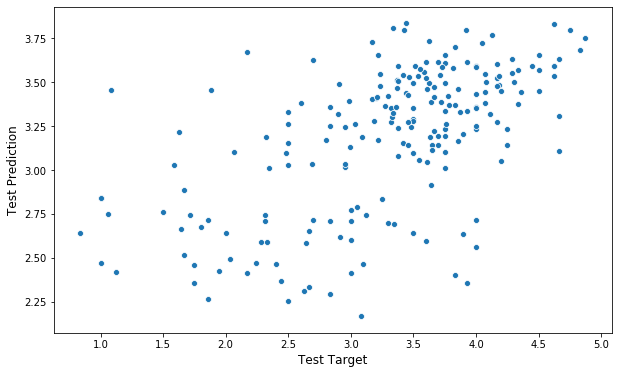

In [160]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=test_high['blind_mean_rating'], y=test_pred_src_user)
plt.xlabel('Test Target', fontsize=12)
plt.ylabel('Test Prediction', fontsize=12)
plt.show()

### Top Coefficients

In [161]:
feat_names = np.hstack([np.array(tfidf_src.get_feature_names()), ohe.get_feature_names(), train_high.loc[:,'pol_aff_Democrat':].columns])

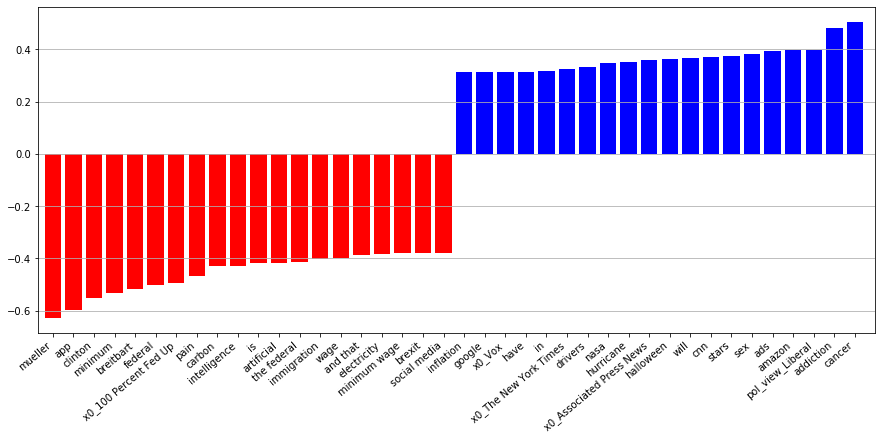

In [162]:
plt.figure(figsize=(15, 6))
plot_important_features(grid_src_user.best_estimator_.named_steps['regressor'].coef_, feat_names, top_n=20, rotation=40)
ax = plt.gca()

### Again, Need to think of a way to introducing interactions without blowing up the feature space. 

________________________________

### Checking Correlation between number of ratings and average ratings on the train set

In [163]:
print(f"Pearson's Correlation between number of ratings and average rating: {train['blind_rating_count'].corr(train['blind_mean_rating']):0.3f}")

Pearson's Correlation between number of ratings and average rating: 0.004


### Plotting number of ratings against the mean rating
#### Using a log scale because most articles are clustered towards the first bin otherwise

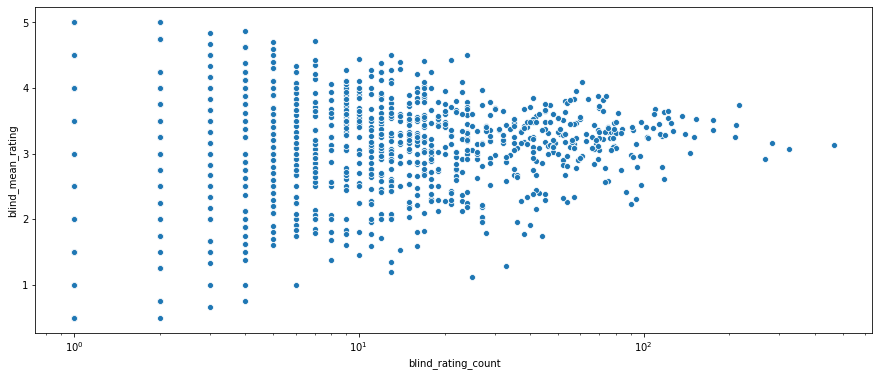

In [164]:
plt.figure(figsize=(15,6))
sns.scatterplot(train['blind_rating_count'], train['blind_mean_rating'])
plt.xscale('log')

### Computing the standard deviation across bins

In [165]:
cm = sns.light_palette("red", as_cmap=True)

In [166]:
train['bin'] = pd.cut(train['blind_rating_count'], bins=list(np.arange(0,21,5))+[1000])
train_bin = train.groupby('bin').agg({'blind_mean_rating':['count', 'mean','std']}).reset_index()
train_bin.columns = ['bin', 'rating_count', 'rating_mean', 'rating_std']

In [167]:
train_bin.style.background_gradient(subset=['rating_mean', 'rating_std'], cmap=cm)

,bin,rating_count,rating_mean,rating_std
0,"(0, 5]",534,3.219179,1.185803
1,"(5, 10]",217,3.150979,0.715595
2,"(10, 15]",148,3.102297,0.678707
3,"(15, 20]",93,3.178661,0.594540
4,"(20, 1000]",309,3.147184,0.490263


The standard deviation is higher for the articles with lower number of ratings (which is expected). This could be one of the reasons the model is unable to do as well for articles that have a lower number of ratings

__________________________

### Checking if the article content is leaking the source Information

In [168]:
train['content_source_desc'].value_counts()

Associated Press News    322
The New York Times       258
Fox News                 218
Vox                      210
Breitbart                157
100 Percent Fed Up        85
Media Matters             51
Name: content_source_desc, dtype: int64

In [169]:
train['content_body_clean'].apply(lambda x:'associated press' in x.lower()).value_counts()

False    1108
True      193
Name: content_body_clean, dtype: int64

In [170]:
train['content_body_clean'].apply(lambda x:'new york times' in x.lower()).value_counts()

False    1198
True      103
Name: content_body_clean, dtype: int64

In [171]:
train['content_body_clean'].apply(lambda x:'vox' in x.lower()).value_counts()

False    1215
True       86
Name: content_body_clean, dtype: int64

In [172]:
train['content_body_clean'].apply(lambda x:'breitbart' in x.lower()).value_counts()

False    1202
True       99
Name: content_body_clean, dtype: int64

In [173]:
train['content_body_clean'].apply(lambda x:'100 percent' in x.lower()).value_counts()

False    1282
True       19
Name: content_body_clean, dtype: int64

In [174]:
train['content_body_clean'].apply(lambda x:'media matters' in x.lower()).value_counts()

False    1277
True       24
Name: content_body_clean, dtype: int64

______________________

### Checking if adding source to the text is as good as adding it a separate variable - using just the ridge model for this test because of quick runtimes

### Without source first

In [178]:
tfidf = TfidfVectorizer(ngram_range=(1,3), min_df=10)

In [179]:
pipe = Pipeline((('tfidf', tfidf),
        ('regressor', Ridge())))

In [180]:
param_grid = [{'regressor':[Ridge(random_state=0)],
              'regressor__alpha':np.logspace(-3,3,8)}]

### Grid searching the models with a 5 fold CV

In [181]:
grid = GridSearchCV(pipe, param_grid, scoring=['r2', 'neg_mean_absolute_error', 'neg_root_mean_squared_error'], 
                    cv=5, verbose=2, refit='neg_mean_absolute_error')

In [182]:
grid.fit(train['content_body_clean'], train['blind_mean_rating'])

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001, total=   6.3s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.3s remaining:    0.0s


[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001, total=   6.3s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001 
[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001, total=   6.2s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001 
[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001, total=   6.2s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, ra

[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=2.6826957952797246, total=   5.8s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=2.6826957952797246 
[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=2.6826957952797246, total=   5.7s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=19.306977288832496 
[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=19.306977288832496, total=   6.0s
[CV] regressor=Ridge(alpha=1.0, copy_X=T

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  4.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=(('tfidf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=10,
                                                        ngram_range=(1, 3),
                                                        

In [186]:
cv_results = pd.DataFrame(grid.cv_results_)
cv_results['regressor'] = cv_results['param_regressor'].apply(lambda x:x.__class__.__name__)

In [187]:
cv_results.query('rank_test_neg_mean_absolute_error<=8')[['regressor', 'param_regressor__alpha', 'mean_test_r2', 'rank_test_r2', 'mean_test_neg_root_mean_squared_error', 'mean_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_error']]

,regressor,param_regressor__alpha,mean_test_r2,rank_test_r2,mean_test_neg_root_mean_squared_error,mean_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error
0,Ridge,0.001,0.024128,6,-0.858005,-0.664746,6
1,Ridge,0.00719686,0.029628,5,-0.855773,-0.662684,5
2,Ridge,0.0517947,0.060132,4,-0.843317,-0.651524,4
3,Ridge,0.372759,0.138970,2,-0.810398,-0.620762,2
4,Ridge,2.6827,0.167547,1,-0.799756,-0.608137,1
5,Ridge,19.307,0.097062,3,-0.832431,-0.637670,3
6,Ridge,138.95,0.021942,7,-0.864251,-0.666658,7
7,Ridge,1000,-0.000142,8,-0.873212,-0.674593,8


### Test Predictions

In [188]:
test_pred = grid.predict(test['content_body_clean'])

In [190]:
print(f"Mean Absolute Error on the Test Set: {mean_absolute_error(test['blind_mean_rating'], test_pred):0.3f}")
print(f"Root Mean Squared Error on the Test Set: {mean_squared_error(test['blind_mean_rating'], test_pred, squared=False):0.3f}")
print(f"R Squared on the Test Set: {r2_score(test['blind_mean_rating'], test_pred):0.3f}")

Mean Absolute Error on the Test Set: 0.745
Root Mean Squared Error on the Test Set: 0.915
R Squared on the Test Set: 0.147


### Top Coefficients

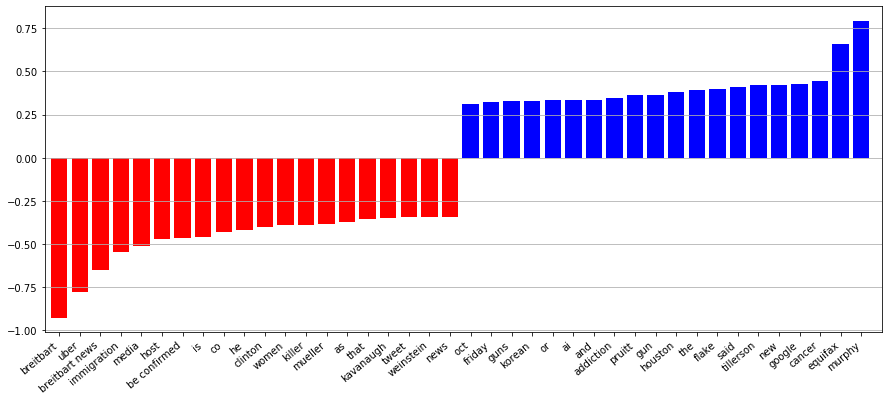

In [191]:
plt.figure(figsize=(15, 6))
plot_important_features(grid.best_estimator_.named_steps['regressor'].coef_.ravel(), np.array(grid.best_estimator_.named_steps['tfidf'].get_feature_names()), top_n=20, rotation=40)
ax = plt.gca()

### With source added to text

In [192]:
grid.fit(train['content_source_desc'] + ' ' + train['content_body_clean'], train['blind_mean_rating'])

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] regressor=Ridge(alpha=2.6826957952797246, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  regressor=Ridge(alpha=2.6826957952797246, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001, total=   6.2s
[CV] regressor=Ridge(alpha=2.6826957952797246, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.2s remaining:    0.0s


[CV]  regressor=Ridge(alpha=2.6826957952797246, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001, total=   6.1s
[CV] regressor=Ridge(alpha=2.6826957952797246, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001 
[CV]  regressor=Ridge(alpha=2.6826957952797246, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001, total=   6.1s
[CV] regressor=Ridge(alpha=2.6826957952797246, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001 
[CV]  regressor=Ridge(alpha=2.6826957952797246, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=0.001, total=   6.0s
[CV] regressor=Ridge(alpha=2.6

[CV]  regressor=Ridge(alpha=2.6826957952797246, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=2.6826957952797246, total=   5.8s
[CV] regressor=Ridge(alpha=2.6826957952797246, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=2.6826957952797246 
[CV]  regressor=Ridge(alpha=2.6826957952797246, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=2.6826957952797246, total=   5.9s
[CV] regressor=Ridge(alpha=2.6826957952797246, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha=2.6826957952797246 
[CV]  regressor=Ridge(alpha=2.6826957952797246, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001), regressor__alpha

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  4.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=(('tfidf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=10,
                                                        ngram_range=(1, 3),
                                                        

In [193]:
cv_results = pd.DataFrame(grid.cv_results_)
cv_results['regressor'] = cv_results['param_regressor'].apply(lambda x:x.__class__.__name__)

In [194]:
cv_results.query('rank_test_neg_mean_absolute_error<=8')[['regressor', 'param_regressor__alpha', 'mean_test_r2', 'rank_test_r2', 'mean_test_neg_root_mean_squared_error', 'mean_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_error']]

,regressor,param_regressor__alpha,mean_test_r2,rank_test_r2,mean_test_neg_root_mean_squared_error,mean_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error
0,Ridge,0.001,0.034714,6,-0.853254,-0.660833,6
1,Ridge,0.00719686,0.040175,5,-0.851020,-0.658786,5
2,Ridge,0.0517947,0.070152,4,-0.838668,-0.647447,4
3,Ridge,0.372759,0.147875,2,-0.806034,-0.616132,2
4,Ridge,2.6827,0.175002,1,-0.796114,-0.604487,1
5,Ridge,19.307,0.100905,3,-0.830713,-0.636173,3
6,Ridge,138.95,0.022915,7,-0.863846,-0.666316,7
7,Ridge,1000,0.000012,8,-0.873149,-0.674542,8


### Test Predictions

In [200]:
test_pred = grid.predict(test['content_source_desc'] + ' ' + test['content_body_clean'])

In [201]:
print(f"Mean Absolute Error on the Test Set: {mean_absolute_error(test['blind_mean_rating'], test_pred):0.3f}")
print(f"Root Mean Squared Error on the Test Set: {mean_squared_error(test['blind_mean_rating'], test_pred, squared=False):0.3f}")
print(f"R Squared on the Test Set: {r2_score(test['blind_mean_rating'], test_pred):0.3f}")

Mean Absolute Error on the Test Set: 0.739
Root Mean Squared Error on the Test Set: 0.908
R Squared on the Test Set: 0.160


### Top Coefficients

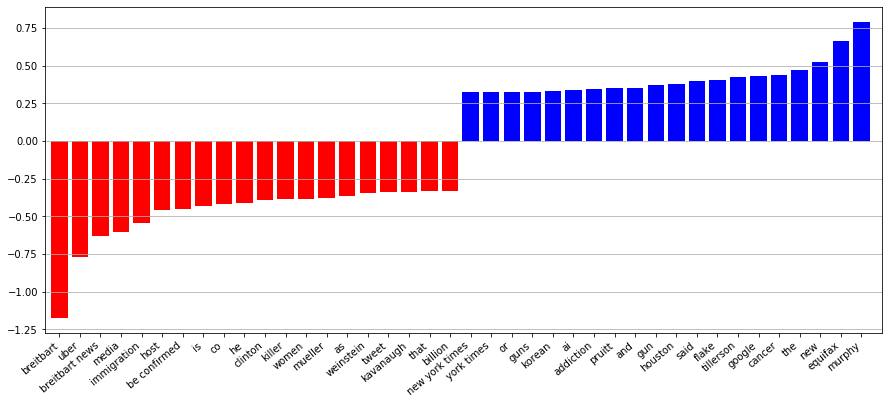

In [202]:
plt.figure(figsize=(15, 6))
plot_important_features(grid.best_estimator_.named_steps['regressor'].coef_.ravel(), np.array(grid.best_estimator_.named_steps['tfidf'].get_feature_names()), top_n=20, rotation=40)
ax = plt.gca()

### With source added to the tfidf matrix

In [203]:
tfidf_src = TfidfVectorizer(ngram_range=(1,3), min_df=10)
ohe = OneHotEncoder(handle_unknown='ignore')

### TFIDF Vectorizer

In [204]:
tfidf_X_train = tfidf_src.fit_transform(train['content_body_clean'])
tfidf_X_test = tfidf_src.transform(test['content_body_clean'])

### One hot encoder for source

In [205]:
ohe_X_train = ohe.fit_transform(train[['content_source_desc']])
ohe_X_test = ohe.transform(test[['content_source_desc']])

### Stacking the two together

In [206]:
tfidf_ohe_X_train = np.hstack([tfidf_X_train.toarray(), ohe_X_train.toarray()])
tfidf_ohe_X_test = np.hstack([tfidf_X_test.toarray(), ohe_X_test.toarray()])

In [207]:
pipe_src = Pipeline([('regressor', Ridge())])

In [208]:
param_grid_src = [{'regressor':[Ridge()],
              'regressor__alpha':np.logspace(-3,3,13)}]

In [209]:
param_grid_src = [{'regressor':[Ridge()],
              'regressor__alpha':np.logspace(-3,3,13)},
              {'regressor':[LinearSVR(max_iter=10000)],
              'regressor__C':np.logspace(-2,3,8)}]

### Grid searching the models with a 5 fold CV

In [215]:
grid_src = GridSearchCV(pipe_src, param_grid_src, scoring=['r2', 'neg_mean_absolute_error', 'neg_root_mean_squared_error'], 
                    cv=5, verbose=2, refit='neg_mean_absolute_error')

In [216]:
grid_src.fit(tfidf_ohe_X_train, train['blind_mean_rating'])

Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001), regressor__alpha=0.001 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001), regressor__alpha=0.001, total=   0.4s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001), regressor__alpha=0.001 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001), regressor__alpha=0.001, total=   0.4s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001), regressor__alpha=0.001 
[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001), regressor__alpha=0.001, total=   0.5s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001), regressor__alpha=0.001 
[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001), regressor__alpha=0.001, total=   0.4s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      norm

[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001), regressor__alpha=0.1, total=   0.4s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001), regressor__alpha=0.1 
[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001), regressor__alpha=0.1, total=   0.5s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001), regressor__alpha=0.31622776601683794 
[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001), regressor__alpha=0.31622776601683794, total=   0.5s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max

[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001), regressor__alpha=31.622776601683793, total=   0.5s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001), regressor__alpha=31.622776601683793 
[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001), regressor__alpha=31.622776601683793, total=   0.5s
[CV] regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001), regressor__alpha=31.622776601683793 
[CV]  regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001), regressor__alpha=31.622776601683793, total=   0.5s
[CV] regressor=Ridge(alph

[CV]  regressor=LinearSVR(C=0.2682695795279726, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=None, tol=0.0001, verbose=0), regressor__C=0.01, total=   0.2s
[CV] regressor=LinearSVR(C=0.2682695795279726, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=None, tol=0.0001, verbose=0), regressor__C=0.01 
[CV]  regressor=LinearSVR(C=0.2682695795279726, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=None, tol=0.0001, verbose=0), regressor__C=0.01, total=   0.2s
[CV] regressor=LinearSVR(C=0.2682695795279726, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=None, tol=0.0001, verbose=0), regressor__C=0.05179474679231

[CV]  regressor=LinearSVR(C=0.2682695795279726, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=None, tol=0.0001, verbose=0), regressor__C=1.3894954943731375, total=   0.5s
[CV] regressor=LinearSVR(C=0.2682695795279726, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=None, tol=0.0001, verbose=0), regressor__C=7.196856730011521 
[CV]  regressor=LinearSVR(C=0.2682695795279726, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=None, tol=0.0001, verbose=0), regressor__C=7.196856730011521, total=   0.8s
[CV] regressor=LinearSVR(C=0.2682695795279726, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=None, tol=0.0001, v

/Users/harish/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  regressor=LinearSVR(C=0.2682695795279726, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=None, tol=0.0001, verbose=0), regressor__C=193.06977288832496, total=  14.5s
[CV] regressor=LinearSVR(C=0.2682695795279726, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=None, tol=0.0001, verbose=0), regressor__C=193.06977288832496 


/Users/harish/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  regressor=LinearSVR(C=0.2682695795279726, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=None, tol=0.0001, verbose=0), regressor__C=193.06977288832496, total=  15.1s
[CV] regressor=LinearSVR(C=0.2682695795279726, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=None, tol=0.0001, verbose=0), regressor__C=193.06977288832496 


/Users/harish/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  regressor=LinearSVR(C=0.2682695795279726, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=None, tol=0.0001, verbose=0), regressor__C=193.06977288832496, total=  14.6s
[CV] regressor=LinearSVR(C=0.2682695795279726, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=None, tol=0.0001, verbose=0), regressor__C=193.06977288832496 


/Users/harish/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  regressor=LinearSVR(C=0.2682695795279726, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=None, tol=0.0001, verbose=0), regressor__C=193.06977288832496, total=  14.5s
[CV] regressor=LinearSVR(C=0.2682695795279726, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=None, tol=0.0001, verbose=0), regressor__C=193.06977288832496 
[CV]  regressor=LinearSVR(C=0.2682695795279726, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=None, tol=0.0001, verbose=0), regressor__C=193.06977288832496, total=  10.0s
[CV] regressor=LinearSVR(C=0.2682695795279726, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=None, tol=0.0001,

/Users/harish/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  regressor=LinearSVR(C=0.2682695795279726, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=None, tol=0.0001, verbose=0), regressor__C=1000.0, total=  14.9s
[CV] regressor=LinearSVR(C=0.2682695795279726, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=None, tol=0.0001, verbose=0), regressor__C=1000.0 


/Users/harish/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  regressor=LinearSVR(C=0.2682695795279726, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=None, tol=0.0001, verbose=0), regressor__C=1000.0, total=  16.0s
[CV] regressor=LinearSVR(C=0.2682695795279726, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=None, tol=0.0001, verbose=0), regressor__C=1000.0 


/Users/harish/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  regressor=LinearSVR(C=0.2682695795279726, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=None, tol=0.0001, verbose=0), regressor__C=1000.0, total=  15.6s
[CV] regressor=LinearSVR(C=0.2682695795279726, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=None, tol=0.0001, verbose=0), regressor__C=1000.0 


/Users/harish/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  regressor=LinearSVR(C=0.2682695795279726, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=None, tol=0.0001, verbose=0), regressor__C=1000.0, total=  15.8s
[CV] regressor=LinearSVR(C=0.2682695795279726, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=None, tol=0.0001, verbose=0), regressor__C=1000.0 
[CV]  regressor=LinearSVR(C=0.2682695795279726, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=None, tol=0.0001, verbose=0), regressor__C=1000.0, total=  17.7s


/Users/harish/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
[Parallel(n_jobs=1)]: Done 105 out of 105 | elapsed:  3.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('regressor',
                                        Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=False,
                                              random_state=None, solver='auto',
                                              tol=0.001))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'regressor': [Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=Fa...
                                                  max_iter=10000,
                                                  random_state=None, tol=0.0001,
                                                  verbose=0)

In [217]:
cv_results_src = pd.DataFrame(grid_src.cv_results_)
cv_results_src['regressor'] = cv_results_src['param_regressor'].apply(lambda x:x.__class__.__name__)

In [218]:
cv_results_src.query('rank_test_neg_mean_absolute_error<=8')[['regressor', 'param_regressor__alpha', 'mean_test_r2', 'rank_test_r2', 'mean_test_neg_root_mean_squared_error', 'mean_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_error']]

,regressor,param_regressor__alpha,mean_test_r2,rank_test_r2,mean_test_neg_root_mean_squared_error,mean_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error
5,Ridge,0.316228,0.150803,9,-0.803590,-0.613556,8
6,Ridge,1,0.184709,5,-0.788437,-0.597614,3
7,Ridge,3.16228,0.194781,2,-0.784160,-0.594760,2
8,Ridge,10,0.190173,4,-0.786995,-0.599060,4
9,Ridge,31.6228,0.181737,6,-0.792240,-0.605499,6
14,LinearSVR,NaN,0.190589,3,-0.786328,-0.600305,5
15,LinearSVR,NaN,0.205844,1,-0.778975,-0.591040,1
16,LinearSVR,NaN,0.160303,7,-0.799417,-0.609081,7


### Test Predictions

In [220]:
test_pred_src = grid_src.predict(tfidf_ohe_X_test)

In [221]:
print(f"Mean Absolute Error on the Test Set: {mean_absolute_error(test['blind_mean_rating'], test_pred_src):0.3f}")
print(f"Root Mean Squared Error on the Test Set: {mean_squared_error(test['blind_mean_rating'], test_pred_src, squared=False):0.3f}")
print(f"R Squared on the Test Set: {r2_score(test['blind_mean_rating'], test_pred_src):0.3f}")

Mean Absolute Error on the Test Set: 0.683
Root Mean Squared Error on the Test Set: 0.847
R Squared on the Test Set: 0.269


### Top Coefficients

In [224]:
feat_names = np.hstack([np.array(tfidf_src.get_feature_names()), ohe.get_feature_names()])

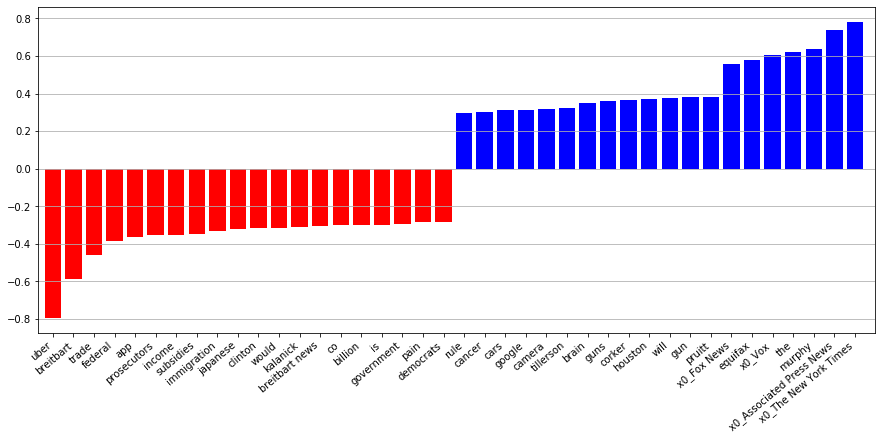

In [225]:
plt.figure(figsize=(15, 6))
plot_important_features(grid_src.best_estimator_.named_steps['regressor'].coef_, feat_names, top_n=20, rotation=40)
ax = plt.gca()

### Not entirely sure why but adding source information as a separate variable seems to work slightly better than adding them as part of the content